In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score,roc_curve,auc
from sklearn.linear_model import LogisticRegression

 # Dataset1

In [2]:
training_set = pd.read_csv("../dataset/labeledTrainData.tsv",sep='\t')

Y=training_set['sentiment'].values
X=training_set['review'].values

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (20000,)
No. of Testing Examples:  (5000,)


# Dataset2

In [7]:
train_data = pd.read_csv("../dataset/dataset2_train.csv")
test_data = pd.read_csv("../dataset/dataset2_test.csv")

y_train = train_data['sentiment']
x_train = train_data['review']

y_test = test_data['sentiment']
x_test = test_data['review']
print ("No. of Training Examples: ",x_train.shape)
print ("No. of Testing Examples: ",x_test.shape)

No. of Training Examples:  (25000,)
No. of Testing Examples:  (4253,)


In [3]:
tf=TfidfVectorizer(min_df=10,max_df=0.95,use_idf=True)

tf.fit_transform(x_train)
X_train=tf.transform(x_train) # for train data we can use fit_transfrom also.
X_test=tf.transform(x_test)
pickle.dump(tf, open('vectorizer.sav', 'wb'))

In [4]:
# Evaluating models peformance based on precision, recall and accuracy
def do_evaluation (predicted, actual, pos_label=0, verbose=True):
    precision = precision_score(actual,predicted,pos_label=pos_label)
    recall = recall_score(actual,predicted,pos_label=pos_label)
    accuracy = accuracy_score(actual,predicted)
    f1score = f1_score(predicted,actual)

    if verbose:
        print('"Positive' if pos_label==1 else '"Negative','Evaluation"','| Precision ==',round(precision*100,2),'| Recall ==',round(recall*100,2),'| Accuracy ==',round(accuracy*100,2),'| F1 score ==',round(f1score*100,2))

In [5]:
#training our model using Logistic Regression Classifier
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train,y_train)
pickle.dump(logreg, open('logreg.sav', 'wb'))
#testin and Evaluating Logistic Regression Model
preds_logreg = logreg.predict(X_test)
print('LogisticRegression: ',accuracy_score(y_test, preds_logreg))
print ('Note that {:.1%} of our classifier guesses were positive'.format(float(sum(preds_logreg))/len(y_test)))
print ('While {:.1%} of the reviews were actually positive'.format(float(sum(y_test))/len(y_test)))

do_evaluation (preds_logreg,y_test, pos_label= 1, verbose=True)
do_evaluation (preds_logreg,y_test, pos_label= 0, verbose=True)

LogisticRegression:  0.8896
Note that 50.9% of our classifier guesses were positive
While 50.0% of the reviews were actually positive
"Positive Evaluation" | Precision == 88.29 | Recall == 89.84 | Accuracy == 88.96 | F1 score == 89.06
"Negative Evaluation" | Precision == 89.66 | Recall == 88.08 | Accuracy == 88.96 | F1 score == 89.06


# E valuate classifier performance(roc and auc curve)

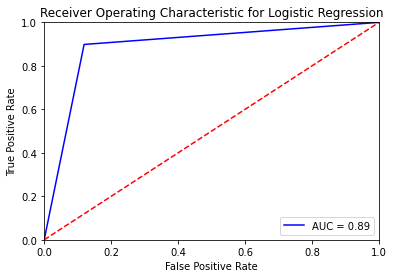

In [18]:
#for Logistic Regression Classifier

#Calculating False Positive Rate,True Positive Rate and threshold
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, preds_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC = %0.2f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Testing

In [19]:
# Load model
logreg = pickle.load(open('logreg.sav','rb'))
tf = pickle.load(open('vectorizer.sav','rb'))

# Testing
test_array = ['love','good','fine','bad','worst']
test_func = lambda x: 'pos' if x==1 else 'neg'
logRe = logreg.predict(tf.transform(test_array).toarray())

for sentence,l in zip(test_array,logRe):
    print(sentence,': Linear SVC=',test_func(l))


love : Linear SVC= pos
good : Linear SVC= pos
fine : Linear SVC= pos
bad : Linear SVC= neg
worst : Linear SVC= neg
